In [100]:
import pandas as pd

# Part 1 specific
import sqlalchemy
from pathlib import Path

# Part 2 specific
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn import utils
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
# ignore the warning you might get from importing ensemble from sklearn
from sklearn import ensemble


In [101]:
## create dataframes from csv data
all_players = pd.read_csv("./data/all_players_2019.csv")
all_teams = pd.read_csv("./data/all_teams_2019.csv")

all_pac12_players = pd.read_csv("./data/pac12_2019_players.csv")
all_pac12_teams = pd.read_csv("./data/pac12_2019_teams.csv")

In [102]:
all_players.columns

Index(['Unnamed: 0', '_player_id', '_name', '_height', '_weight', '_position',
       '_season', '_team_abbreviation', '_minutes_played', '_total_rebounds',
       '_player_efficiency_rating', '_field_goal_percentage',
       '_free_throw_percentage', '_two_point_percentage',
       '_three_point_percentage', '_offensive_rebounds', '_assists',
       '_turnovers', '_usage_percentage', '_offensive_win_shares',
       '_defensive_rebounds', '_steals', '_blocks', '_defensive_win_shares'],
      dtype='object')

# Functional Library for Normalizing Data

ALL functions below creates a copy of the df to not modify the actual dataframes directly

In [103]:
## Returns a copy of the dataframe with the specific desired columns
def get_desired_columns_from_df(df, columns_wanted):
    copied = df.copy()
    return copied[columns_wanted]

## Gets rid of the string valued columns and normalizes the data
def normalize_data(df):
    ## Select mean and std
    team_desc = df.describe().loc['mean':'std']
    team_means = team_desc.loc['mean']
    team_std = team_desc.loc['std']
    
    # teams_selected_columns.iloc[:,1:]
    values_useful = df.copy()
    values_useful.index = values_useful['abbreviation']
    values_useful = values_useful.drop(['abbreviation','name', 'conference'], axis=1)
    return (((values_useful - team_means) / team_std), team_means, team_std)

## normalizes the data, assuming the dataframe has no string values
def normalize_nonstring_data(df):
    ## Select mean and std
    team_desc = df.describe().loc['mean':'std']
    team_means = team_desc.loc['mean']
    team_std = team_desc.loc['std']
    
    # teams_selected_columns.iloc[:,1:]
    values_useful = df.copy()
    return (((values_useful - team_means) / team_std), team_means, team_std)




# Normalize the all team dataframe (includes train and test splits)

We create 6 different data frames and find important summary statistics (mean and std), which can be categorized into 2 groups


#### Raw
1. All the teams `raw` data, mean, and std
2. The training `raw` data, mean, and std
3. The testing `raw` data, mean, and std

#### Normalized 
1. All the teams `normalized` data, mean, and std
2. The training `normalized` data, mean, and std
3. The testing `normalized` data, mean, and std


### Split all the teams into train and split

In [104]:
## Split up data into train and test splits
raw_train_teams, raw_test_teams = train_test_split(all_teams, test_size = 0.2,random_state = 100)

## Get raw all teams mean and std
raw_all_teams_mean = all_teams.describe().loc['mean']
raw_all_teams_std = all_teams.describe().loc['std']

## Get the raw train mean and std
raw_train_mean = raw_train_teams.describe().loc['mean']
raw_train_std = raw_train_teams.describe().loc['std']

## Get the raw test mean and std
raw_test_mean = raw_test_teams.describe().loc['mean']
raw_test_std = raw_test_teams.describe().loc['std']

### Create the normalized versions for all teams, training, and testing data

In [105]:
team_columns_wanted = ["abbreviation","name","conference","assists","blocks","field_goal_percentage","free_throw_percentage",
                   "free_throw_attempts","losses","net_rating","offensive_rating","offensive_rebounds",
                   "opp_assists","opp_field_goal_percentage","opp_offensive_rating","opp_three_point_field_goal_percentage",
                   "pace","points","three_point_field_goal_percentage","three_point_field_goal_attempts","total_rebounds",
                   "true_shooting_percentage","turnovers","turnover_percentage","two_point_field_goal_percentage","wins","win_percentage"
                  ]

team_columns_wanted_without_strings = team_columns_wanted[3:]

## Create a copy of the normalized raw all teams
selected_cols_raw_all_teams = get_desired_columns_from_df(all_teams, team_columns_wanted)
normalized_all_teams, normalized_all_teams_mean, normalized_all_teams_std = normalize_data(selected_cols_raw_all_teams)
print("Normalized all teams")
display(normalized_all_teams)


## Normalize the training data
selected_cols_raw_train = get_desired_columns_from_df(raw_train_teams, team_columns_wanted)
normalized_train, normalized_train_mean, normalized_train_std = normalize_data(selected_cols_raw_train)
print("Normalized train teams")
display(normalized_train)

## Normalize the testing data
selected_cols_raw_test = get_desired_columns_from_df(raw_test_teams, team_columns_wanted)
normalized_test, normalized_test_mean, normalized_test_std = normalize_data(selected_cols_raw_test)
print("Normalized test teams")
display(normalized_test)


Normalized all teams


,assists,blocks,field_goal_percentage,free_throw_percentage,free_throw_attempts,losses,net_rating,offensive_rating,offensive_rebounds,opp_assists,...,points,three_point_field_goal_percentage,three_point_field_goal_attempts,total_rebounds,true_shooting_percentage,turnovers,turnover_percentage,two_point_field_goal_percentage,wins,win_percentage
abbreviation,,,,,,,,,,,,,,,,,,,,,
ABILENE-CHRISTIAN,1.163484,-0.517882,1.065333,0.157893,0.096389,-1.755243,1.506034,0.844770,-0.071537,-1.449693,...,0.391584,1.435245,-0.701959,-0.488457,0.877766,-0.399298,-0.391478,0.323651,1.552489,1.666118
AIR-FORCE,-0.129128,-1.588700,0.368845,-0.778849,-1.244558,0.416716,-0.772266,-0.709977,-1.241540,0.209391,...,-0.849914,-0.617075,-0.260247,-0.759205,-0.014963,-0.071931,0.689923,0.842133,-0.490049,-0.438075
AKRON,-0.626287,-0.131198,-1.392860,-0.034966,-0.897262,0.021815,0.640280,-0.607466,-0.282788,-1.697602,...,-0.496299,-0.979250,1.627853,0.282764,-0.982087,-0.788048,-0.676057,-0.438821,-0.018694,0.017045
ALABAMA-AM,-0.825151,-1.796914,-1.474800,-2.183961,-1.726913,2.193774,-1.979765,-2.555171,-0.250287,0.037762,...,-1.776233,-1.180458,-1.412162,-1.128407,-2.321181,1.237541,1.828239,-1.689277,-1.904113,-2.104879
ALABAMA-BIRMINGHAM,-0.597878,-0.845076,0.368845,-0.916605,-0.019376,-0.175636,0.309926,0.263876,0.610965,0.228461,...,0.268587,-0.295143,-0.407485,0.898100,-0.200948,-0.562982,-0.789888,0.232155,0.452661,0.348042
ALABAMA-STATE,-1.847877,-0.250178,-1.597710,-1.495181,0.501567,0.614167,-0.965922,-1.325042,0.578465,-0.114798,...,-1.207373,-0.939008,-0.589366,-0.619729,-1.577240,0.500963,0.917586,-1.536782,-0.804285,-0.739518
ALABAMA,-0.356401,1.475029,-0.122794,-1.109464,1.032158,0.021815,-0.100168,-0.146167,0.887215,-0.915735,...,0.184027,-0.174418,-0.199620,0.947327,-0.312540,0.787410,0.348428,-0.194830,0.138424,0.099795
ALBANY-NY,-0.583674,-0.964056,-1.106071,1.067083,-0.656085,0.811618,-0.533045,-0.761232,-0.575288,0.571720,...,-0.961380,0.107273,0.423972,-0.726387,-0.312540,0.562345,1.259081,-0.987802,-0.804285,-0.810446
ALCORN-STATE,-0.739923,-0.101453,-1.269951,-0.889054,-0.858674,1.009069,-1.239318,-1.786340,0.074713,1.086608,...,-1.557145,-0.697559,-0.823213,-0.742796,-1.391254,1.339844,2.112818,-1.292791,-1.118522,-1.117800


Normalized train teams


,assists,blocks,field_goal_percentage,free_throw_percentage,free_throw_attempts,losses,net_rating,offensive_rating,offensive_rebounds,opp_assists,...,points,three_point_field_goal_percentage,three_point_field_goal_attempts,total_rebounds,true_shooting_percentage,turnovers,turnover_percentage,two_point_field_goal_percentage,wins,win_percentage
abbreviation,,,,,,,,,,,,,,,,,,,,,
CANISIUS,0.348961,-0.025602,-0.327632,-0.413294,-0.562519,0.217508,-0.822535,-0.387235,-0.461454,-0.473332,...,-0.577368,-0.791706,0.475287,-1.157678,-0.272610,-0.268197,0.141643,0.434384,-0.315906,-0.245107
MICHIGAN,1.008546,1.284160,0.199166,-0.154104,-0.523653,-1.754750,1.795980,0.491606,-0.477573,-1.006442,...,0.704476,-0.068268,0.902818,1.161717,0.026810,-1.843435,-2.249133,0.373877,2.057598,1.778093
ORAL-ROBERTS,-0.109880,-0.057547,0.523349,-0.442093,-1.368982,1.006411,-1.038847,0.095266,0.102717,1.089231,...,-0.324944,0.735553,-0.032406,-0.158935,0.288802,0.438640,0.783071,0.313370,-0.948841,-0.984580
LIBERTY,1.295322,-0.408946,1.779558,1.977009,-1.058057,-1.754750,1.978138,1.577234,-0.945029,-1.263805,...,1.016063,1.016890,1.205653,0.063925,2.047894,-0.611518,-0.616408,2.279844,1.899364,1.748514
BETHUNE-COOKMAN,0.033508,-0.025602,-0.165540,-2.774798,0.545154,0.217508,0.042713,-0.869737,1.392251,0.133310,...,-0.419603,-0.912280,-0.914189,0.889333,-1.021160,1.529189,1.307876,-0.231192,-0.474140,-0.345675
RHODE-ISLAND,-0.583060,0.645252,-0.570769,-0.758880,0.690900,-0.176944,0.099638,-0.490629,0.747484,-0.454949,...,-0.407771,-2.560112,-1.092327,0.229007,-1.170870,-0.409565,-0.499784,-0.170685,0.158795,0.204493
ARKANSAS-STATE,-1.127934,0.964706,-1.016521,0.825056,0.856079,0.611960,-0.754226,-0.180449,1.198821,-0.234352,...,-0.147458,-0.389796,-0.255078,0.369326,-0.609457,0.458836,0.258267,-1.138796,-0.632373,-0.617801
NICHOLLS-STATE,-0.195913,0.613306,-0.854429,1.833015,-2.087998,0.217508,-0.389911,-0.352771,-0.783838,0.482589,...,-0.537927,0.936508,1.294722,-1.033867,-0.235183,-0.793276,-0.441473,-1.138796,-0.474140,-0.345675
GEORGE-WASHINGTON,-0.955869,-0.408946,-1.583841,-0.614886,-0.319608,1.598089,-1.471472,-1.869204,-0.880553,0.592887,...,-1.180821,-1.314190,-0.949816,-0.414811,-1.807137,-0.248002,0.083332,-1.592597,-1.265308,-1.404601


Normalized test teams


,assists,blocks,field_goal_percentage,free_throw_percentage,free_throw_attempts,losses,net_rating,offensive_rating,offensive_rebounds,opp_assists,...,points,three_point_field_goal_percentage,three_point_field_goal_attempts,total_rebounds,true_shooting_percentage,turnovers,turnover_percentage,two_point_field_goal_percentage,wins,win_percentage
abbreviation,,,,,,,,,,,,,,,,,,,,,
OKLAHOMA,-0.256322,-0.359228,0.185396,-0.211725,-0.097864,-0.366164,0.306702,-0.195207,-0.459182,-0.206183,...,0.028077,-0.034729,-0.790262,0.644689,-0.284027,-0.657818,-0.681117,-0.231220,0.364837,0.405116
CENTRAL-FLORIDA,-0.133357,0.805613,0.952180,-1.348041,1.580927,-1.350922,1.100612,0.543757,-0.292078,-0.546097,...,-0.104588,0.733295,-0.994521,0.259975,0.545699,-0.830799,-0.421121,0.489358,0.974330,1.218895
TEXAS-CHRISTIAN,2.039029,1.096823,0.611387,-0.566824,0.554999,-0.366164,0.476825,0.198907,1.044751,3.034334,...,1.099872,-0.034729,0.458865,1.317938,0.184948,1.461208,0.202870,0.583346,0.821956,0.604170
CALIFORNIA-RIVERSIDE,-0.324636,-1.378463,0.015000,-0.519478,-1.907227,1.406401,-0.872822,-0.425107,-0.776679,0.269697,...,-0.914544,1.177941,-0.091065,-1.054463,-0.031502,-0.138873,0.670864,-0.419197,-1.158894,-1.263422
GRAMBLING,-0.392950,0.732810,0.398392,-0.495804,1.422374,0.224691,0.215969,-0.753535,-0.425761,-0.636741,...,0.038551,2.269343,-1.583732,0.837046,0.184948,2.261248,1.658850,-0.983128,-0.092282,-0.110082
HOFSTRA,0.590772,0.126123,1.846762,2.273965,1.291802,-1.547873,1.486226,2.481485,-0.459182,1.787982,...,1.759707,1.541742,0.356735,-0.100694,2.205151,-1.933557,-2.033098,1.429242,1.431449,1.476494
SAM-HOUSTON-STATE,1.451528,-0.553368,-0.027599,1.113976,-1.030525,-0.760067,0.624266,0.593022,0.610281,-0.070217,...,0.213110,0.814140,0.670981,0.067618,0.257098,-0.398345,-0.421121,-0.262550,0.517210,0.686134
FLORIDA-STATE,0.358504,1.072556,-0.027599,0.900917,1.394394,-1.547873,1.032563,0.428807,1.429089,-1.452536,...,1.243011,-0.600642,0.506002,1.670592,0.112798,1.309849,-0.057126,0.144733,1.736195,1.552603
ALBANY-NY,-0.638880,-0.941648,-1.135176,0.924590,-0.601501,0.815546,-0.555258,-0.737114,-0.642996,0.654934,...,-0.925018,0.005693,0.278174,-0.814017,-0.320103,0.488186,1.086858,-0.983128,-0.854148,-0.841897


### From here on, we have selected the `team_columns_wanted` for the corresponding dataframes

Normalized data are in standard units:
* `normalized_all_teams`
* `normalized_train`
* `normalized_test`

Raw data are the actual raw data points:
* `selected_cols_raw_all_teams`
* `selected_cols_raw_train`
* `selected_cols_raw_test`


In [106]:
## sort by win percentage to find the teams with highest win percentage, as that will be our baseline reference
ordered_normalized_all_teams = normalized_all_teams.sort_values("win_percentage")

##  Create Linear Regression Models

### Linear Model 1

Training and fitting a Linear Regression model on the normalized team data

In [50]:
## Select columns for training data
training_columns_wanted = ["assists","blocks","field_goal_percentage","free_throw_percentage",
                       "free_throw_attempts","net_rating","offensive_rating","offensive_rebounds",
                       "opp_assists","opp_field_goal_percentage","opp_offensive_rating","opp_three_point_field_goal_percentage",
                       "pace","points","three_point_field_goal_percentage","three_point_field_goal_attempts","total_rebounds",
                       "true_shooting_percentage", 'turnovers', "turnover_percentage","two_point_field_goal_percentage"
                      ]

In [51]:
## Train on normalized data
on_normalized_data_model = LinearRegression()

## Grab the normalized training data
normalized_X_train = normalized_train[training_columns_wanted]
normalized_Y_train = normalized_train["wins"]

## Grab the normalized testing data
normalized_X_test = normalized_test[training_columns_wanted]
normalized_Y_test = normalized_test["wins"]

## Fit to normalized training data
on_normalized_data_model.fit(normalized_X_train, normalized_Y_train)

## Predcit of normalized testing data
on_normalzied_data_y_hat = on_normalized_data_model.predict(normalized_X_test)


MSE :  0.067324546178496
MAE :  0.19693565979719738


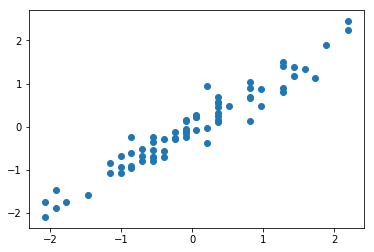

In [52]:
on_normalzied_data_mse = mean_squared_error(normalized_Y_test, on_normalzied_data_y_hat)
on_normalzied_data_mae = mean_absolute_error(normalized_Y_test, on_normalzied_data_y_hat)
plt.scatter(normalized_Y_test, on_normalzied_data_y_hat)
print("MSE : ", on_normalzied_data_mse)
print("MAE : ", on_normalzied_data_mae)

### Linear Model 2

Training and fitting a Linear Regression model on the actual team data, named `selected_cols_raw_all_teams` (includes train and test data)

In [55]:
## Train on raw data
on_raw_data_model = LinearRegression()

## Grab the raw training data
on_raw_X_train = selected_cols_raw_train[training_columns_wanted]
on_raw_Y_train = selected_cols_raw_train["wins"]

## Grab the raw testing data
on_raw_X_test = selected_cols_raw_test[training_columns_wanted]
on_raw_Y_test = selected_cols_raw_test["wins"]

## Fit to raw training data
on_raw_data_model.fit(on_raw_X_train, on_raw_Y_train)

## Predcit of normalized testing data
on_raw_data_y_hat = on_raw_data_model.predict(on_raw_X_test)


MSE :  2.8145010630188527
MAE :  1.335776218552554


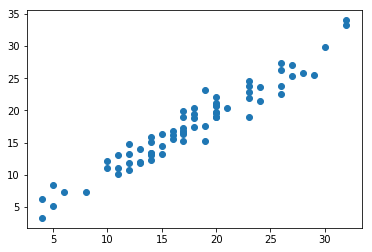

In [56]:
on_raw_data_mse = mean_squared_error(on_raw_Y_test, on_raw_data_y_hat)
on_raw_data_mae = mean_absolute_error(on_raw_Y_test, on_raw_data_y_hat)
plt.scatter(on_raw_Y_test, on_raw_data_y_hat)
print("MSE : ", on_raw_data_mse)
print("MAE : ", on_raw_data_mae)

### Linear Model 3

Training and fitting a Linear Regression model on the actual team data, named `selected_cols_raw_all_teams` (includes train and test data) weighted by the `correlation` to win percentage.

1. Find Correlation weights of desired attributes and wins
2. Multiply coefficients to the training data

## This achieves perfection. WE SEE THE LIGHT

By weighing the attributes by their correspondinig correlation to wins, we ensure eliminate errors between the predicted and actual wins values. 

The reason being is that not all attributes are weighed equally. They are weighed by their correlation. 

Intuitively, this makes sense because `points` are much more important than `turnovers` when trying to win a game. This is a simple example, but this is across all attributes, as listed in `attributes_for_correlation`.



In [119]:
attributes_for_correlation = ['assists', 'blocks', 'field_goal_percentage', 'free_throw_percentage',
       'free_throw_attempts', 'net_rating', 'offensive_rating',
       'offensive_rebounds', 'opp_assists', 'opp_field_goal_percentage',
       'opp_offensive_rating', 'opp_three_point_field_goal_percentage', 'pace',
       'points', 'three_point_field_goal_percentage',
       'three_point_field_goal_attempts', 'total_rebounds',
       'true_shooting_percentage', 'turnovers', 'turnover_percentage',
       'two_point_field_goal_percentage']

def correlation(t, x, y):
    ## ENSURE T IS ALREADY IN STD UNITS
    return np.mean(t[x]*t[y])

## Grab all normalized teams
correlation_normalized_all_teams = normalized_all_teams.copy()

## Grab the normalized training data
correlation_normalized_X_train = normalized_train.copy() ## Should already have no strings in data and includes wins/wins percentage
correlation_normalized_train_mean = normalized_train_mean
correlation_normalized_train_std = normalized_train_std 
correlation_normalized_Y_train = correlation_normalized_X_train['wins']

## Grab the normalized testing data
correlation_normalized_X_test = normalized_test.copy()
correlation_normalized_test_mean = normalized_test_mean
correlation_normalized_test_std = normalized_test_std 
correlation_normalized_Y_test = correlation_normalized_X_test['wins']


## Modify the train and tet by the corresponding correlations and map to dictionary
## scaled_mapping is the correlations between each attribute and number of wins
train_correlation_mapping = {}
test_correlation_mapping = {}
all_correlation_mapping = {}

train_scales = []
test_scales = []
all_scales = []

# print("Before correlation weighing")
# print("train mapping: ")
# display(correlation_normalized_X_train)
#
# print("test mapping: ")
# display(correlation_normalized_X_test)
#
# print("all mapping: ")
# display(correlation_normalized_all_teams)

## With normalize data, multiply correlations to their corresponding columns to indicate how important that feature is
for att in attributes_for_correlation:
    ## calclate correlations
    att_train_correlation = correlation(correlation_normalized_X_train, att, 'wins')
    att_test_correlation = correlation(correlation_normalized_X_test, att, 'wins')
    att_all_correlation = correlation(correlation_normalized_all_teams, att, 'wins')
    
    # Retaining correlation
    train_scales.append(att_train_correlation)
    test_scales.append(att_test_correlation)
    all_scales.append(att_all_correlation)
    
    train_correlation_mapping[att] = att_train_correlation
    test_correlation_mapping[att] = att_test_correlation
    all_correlation_mapping[att] = att_all_correlation
    
    ## Scale normal data by correlation. Must multiple by the `att_train_correlation` bc that is what we have access to on new data
    correlation_normalized_X_train[att] = correlation_normalized_X_train[att] * att_train_correlation
    correlation_normalized_X_test[att] = correlation_normalized_X_test[att] * att_train_correlation
    correlation_normalized_all_teams[att] = correlation_normalized_all_teams[att] * att_train_correlation

# print("`correlation_normalized_X_test` now is a weighed version of the normalized data based on correlations with the wins")
# print("After correlation weighing")
# print("train mapping: ")
# display(correlation_normalized_X_train)
#
# print("test mapping: ")
# display(correlation_normalized_X_test)
#
# print("all mapping: ")
# display(correlation_normalized_all_teams)



# display(correlation_all_team)

In [120]:
correlated_model = LinearRegression()

## Fit to correlated normalized data
correlated_model.fit(correlation_normalized_X_train, correlation_normalized_Y_train)

## Predict using the correlated normalized linear regression
# correlated_X_predict = correlation_all_team_test[training_columns_wanted]

correlated__normalized_y_hat = correlated_model.predict(correlation_normalized_X_test)

## Normalized the test data
# correlated_y_true, correlated_test_mean, correlated_test_std = normalize_data(correlation_normalized_all_test)
# correlated_y_true = correlation_normalized_all_test['wins']



MSE :  5.9537038673954296e-30
MAE :  1.943574409394409e-15


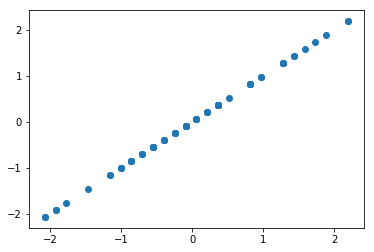

In [121]:
correlated_normal_mse = mean_squared_error(correlation_normalized_Y_test, correlated__normalized_y_hat)
correlated_normal_mae = mean_absolute_error(correlation_normalized_Y_test, correlated__normalized_y_hat)
plt.scatter(correlation_normalized_Y_test, correlated__normalized_y_hat)
print("MSE : ", correlated_normal_mse)
print("MAE : ", correlated_normal_mae)

In [116]:
## See the correlations for the different split data sets
print("train mapping: ")
display(train_correlation_mapping)
print()

print("test mapping: ")
display(test_correlation_mapping)
print()

print("all mapping: ")
display(all_correlation_mapping)

train mapping: 


{'assists': 0.6654546773081536,
 'blocks': 0.4304641490186445,
 'field_goal_percentage': 0.5963255195413198,
 'free_throw_percentage': 0.23421963935215756,
 'free_throw_attempts': 0.4139101598544424,
 'net_rating': 0.9217004602429494,
 'offensive_rating': 0.7500437280350924,
 'offensive_rebounds': 0.35095667225164806,
 'opp_assists': -0.20925221114385645,
 'opp_field_goal_percentage': -0.6565483639374947,
 'opp_offensive_rating': -0.7371774574611148,
 'opp_three_point_field_goal_percentage': -0.5273153805833306,
 'pace': -0.07982569938965109,
 'points': 0.7768729428324928,
 'three_point_field_goal_percentage': 0.35159642388772355,
 'three_point_field_goal_attempts': 0.34647348128296296,
 'total_rebounds': 0.6619112170883134,
 'true_shooting_percentage': 0.5958467095377064,
 'turnovers': -0.05251998544403762,
 'turnover_percentage': -0.4588049076171413,
 'two_point_field_goal_percentage': 0.5604765382325105}


test mapping: 


{'assists': 0.6776929061123911,
 'blocks': 0.6305637715096771,
 'field_goal_percentage': 0.5120673925232795,
 'free_throw_percentage': 0.21294588972266967,
 'free_throw_attempts': 0.5365409418759675,
 'net_rating': 0.9327591991466493,
 'offensive_rating': 0.758367702542355,
 'offensive_rebounds': 0.43373118004788247,
 'opp_assists': -0.15942962411767816,
 'opp_field_goal_percentage': -0.5812552510040606,
 'opp_offensive_rating': -0.7122691333033719,
 'opp_three_point_field_goal_percentage': -0.44651386942221744,
 'pace': 0.07082545697247622,
 'points': 0.8064626904080393,
 'three_point_field_goal_percentage': 0.3122194768762396,
 'three_point_field_goal_attempts': 0.47846458828555377,
 'total_rebounds': 0.7516673771014393,
 'true_shooting_percentage': 0.5295923027015595,
 'turnovers': -0.1556021494241064,
 'turnover_percentage': -0.6237347520874033,
 'two_point_field_goal_percentage': 0.5127870561487065}


all mapping: 


{'assists': 0.6705947017499697,
 'blocks': 0.48189402450975616,
 'field_goal_percentage': 0.5801088857202532,
 'free_throw_percentage': 0.2289690124206667,
 'free_throw_attempts': 0.4404334844337297,
 'net_rating': 0.9263304849912313,
 'offensive_rating': 0.7536334800751393,
 'offensive_rebounds': 0.36909060792366355,
 'opp_assists': -0.19961745371638243,
 'opp_field_goal_percentage': -0.6416795087442887,
 'opp_offensive_rating': -0.7340902442819183,
 'opp_three_point_field_goal_percentage': -0.5106148625472117,
 'pace': -0.051477878960740395,
 'points': 0.7857840651915943,
 'three_point_field_goal_percentage': 0.34566939748072845,
 'three_point_field_goal_attempts': 0.3789045482878669,
 'total_rebounds': 0.6835361690178334,
 'true_shooting_percentage': 0.5833263287053966,
 'turnovers': -0.0708117218469224,
 'turnover_percentage': -0.4954833629183635,
 'two_point_field_goal_percentage': 0.5511366076701941}

In [117]:
## Take a look at the correlation
correlation_normalized_all_teams

,assists,blocks,field_goal_percentage,free_throw_percentage,free_throw_attempts,losses,net_rating,offensive_rating,offensive_rebounds,opp_assists,...,points,three_point_field_goal_percentage,three_point_field_goal_attempts,total_rebounds,true_shooting_percentage,turnovers,turnover_percentage,two_point_field_goal_percentage,wins,win_percentage
abbreviation,,,,,,,,,,,,,,,,,,,,,
ABILENE-CHRISTIAN,1.163484,-0.517882,1.065333,0.157893,0.096389,-1.755243,1.506034,0.844770,-0.071537,-1.449693,...,0.391584,1.435245,-0.701959,-0.488457,0.877766,-0.399298,-0.391478,0.323651,1.552489,1.666118
AIR-FORCE,-0.129128,-1.588700,0.368845,-0.778849,-1.244558,0.416716,-0.772266,-0.709977,-1.241540,0.209391,...,-0.849914,-0.617075,-0.260247,-0.759205,-0.014963,-0.071931,0.689923,0.842133,-0.490049,-0.438075
AKRON,-0.626287,-0.131198,-1.392860,-0.034966,-0.897262,0.021815,0.640280,-0.607466,-0.282788,-1.697602,...,-0.496299,-0.979250,1.627853,0.282764,-0.982087,-0.788048,-0.676057,-0.438821,-0.018694,0.017045
ALABAMA-AM,-0.825151,-1.796914,-1.474800,-2.183961,-1.726913,2.193774,-1.979765,-2.555171,-0.250287,0.037762,...,-1.776233,-1.180458,-1.412162,-1.128407,-2.321181,1.237541,1.828239,-1.689277,-1.904113,-2.104879
ALABAMA-BIRMINGHAM,-0.597878,-0.845076,0.368845,-0.916605,-0.019376,-0.175636,0.309926,0.263876,0.610965,0.228461,...,0.268587,-0.295143,-0.407485,0.898100,-0.200948,-0.562982,-0.789888,0.232155,0.452661,0.348042
ALABAMA-STATE,-1.847877,-0.250178,-1.597710,-1.495181,0.501567,0.614167,-0.965922,-1.325042,0.578465,-0.114798,...,-1.207373,-0.939008,-0.589366,-0.619729,-1.577240,0.500963,0.917586,-1.536782,-0.804285,-0.739518
ALABAMA,-0.356401,1.475029,-0.122794,-1.109464,1.032158,0.021815,-0.100168,-0.146167,0.887215,-0.915735,...,0.184027,-0.174418,-0.199620,0.947327,-0.312540,0.787410,0.348428,-0.194830,0.138424,0.099795
ALBANY-NY,-0.583674,-0.964056,-1.106071,1.067083,-0.656085,0.811618,-0.533045,-0.761232,-0.575288,0.571720,...,-0.961380,0.107273,0.423972,-0.726387,-0.312540,0.562345,1.259081,-0.987802,-0.804285,-0.810446
ALCORN-STATE,-0.739923,-0.101453,-1.269951,-0.889054,-0.858674,1.009069,-1.239318,-1.786340,0.074713,1.086608,...,-1.557145,-0.697559,-0.823213,-0.742796,-1.391254,1.339844,2.112818,-1.292791,-1.118522,-1.117800


# After Developing Model, create the demand vector

Create comparisons of all the teams compared to the top `optimal_baseline_percentage` of the entire NCAAB league

In [107]:
# select top 5% teams as optimal
optimal_baseline_percentage = .05
num_of_teams_in_optimal_baseline = int(optimal_baseline_percentage * selected_cols_all_team.shape[0])

## Pick out the summary stats for the of 5% of teams
normalized_top_5 = ordered_normalized_all_teams.iloc[:num_of_teams_in_optimal_baseline,:]
normalized_top_5_mean = normalized_top_5.describe().loc['mean']
normalized_top_5_std = normalized_top_5.describe().loc['std']

demeaned_comparison_stats = ordered_normalized_all_teams - normalized_top_5_mean
demeaned_comparison_stats

,assists,blocks,field_goal_percentage,free_throw_percentage,free_throw_attempts,losses,net_rating,offensive_rating,offensive_rebounds,opp_assists,...,points,three_point_field_goal_percentage,three_point_field_goal_attempts,total_rebounds,true_shooting_percentage,turnovers,turnover_percentage,two_point_field_goal_percentage,wins,win_percentage
abbreviation,,,,,,,,,,,,,,,,,,,,,
CHICAGO-STATE,-0.035511,-0.104107,0.143395,-0.210570,0.613969,0.564145,-1.698147,-1.186196,-0.784645,1.490179,...,-0.109818,-0.948551,-1.458762,-0.406708,-0.385255,1.385468,1.219625,-0.130710,-0.325459,-0.406991
SAN-JOSE-STATE,0.632102,-0.699006,-0.102425,-0.789146,0.990206,0.169244,-0.547606,-0.126918,0.369108,1.413899,...,0.166924,0.218454,0.013610,0.700897,-0.013285,0.812574,0.536635,-0.191707,-0.168341,-0.200118
NORTH-CAROLINA-ASHEVILLE,-0.674715,0.312322,-0.143395,1.580259,-0.775213,0.169244,-0.650129,0.078103,-0.037143,1.299480,...,-0.544151,0.097730,0.412017,-0.931795,0.358686,0.239680,1.048877,0.174280,-0.168341,-0.200118
TULANE,0.930397,0.996455,0.184365,0.147596,0.652557,0.169244,0.318148,0.163529,-0.037143,-0.397744,...,0.320670,-0.183961,0.264779,0.709102,0.321489,0.464746,0.252056,0.387772,-0.168341,-0.200118
ALABAMA-AM,0.092329,-0.758496,0.020485,-1.560580,-0.620860,0.169244,0.158667,-0.639472,0.222858,-0.645653,...,-0.232815,-0.304686,-0.532033,-0.103142,-0.645635,0.873955,0.764298,-0.130710,-0.011223,-0.040530
IDAHO,0.291193,-0.669261,1.413461,1.111889,-0.099916,0.169244,0.466238,1.222807,-0.687145,0.746452,...,0.674285,1.908600,0.334068,0.134788,1.697780,-0.230911,-0.146355,0.936752,-0.011223,-0.040530
MAINE,1.313919,0.550281,1.044732,-0.982004,-0.630507,0.169244,0.443455,0.266040,-0.329644,0.422263,...,-0.040633,-0.465653,0.065576,-0.242618,0.581868,0.321522,0.593551,1.546731,-0.011223,-0.040530
NEW-HAMPSHIRE,-0.759943,-0.669261,-1.249582,-2.028951,-1.276862,-0.423109,0.500412,-0.502791,-0.654645,-3.429864,...,-0.986170,0.379421,1.278118,-0.480548,-0.831620,-1.806370,-1.057008,-1.137174,-0.011223,0.054040
KENNESAW-STATE,-0.234375,0.907221,-1.044732,0.312903,0.700793,-0.028207,-0.171686,-0.571132,1.165360,0.803661,...,0.120800,-0.465653,-1.744575,0.971645,-1.501167,-0.149069,-0.943176,-1.594658,0.145896,0.148611


In [ ]:
comparison_stats.columns


In [ ]:
comparison_stats.sort_values("win_percentage",ascending = False).iloc[:14,:]

In [ ]:
top_5_mean

In [ ]:
top_5

In [ ]:
attributes_for_correlation = [ 'field_goal_percentage', 'free_throw_percentage',
     'net_rating', 'offensive_rating',
     'opp_field_goal_percentage', 'opp_three_point_field_goal_percentage', 'pace',
       'points', 'three_point_field_goal_percentage',
       'true_shooting_percentage', 'turnover_percentage',"turnovers",
       'two_point_field_goal_percentage', 'wins', 'win_percentage',
       'assists_per game', 'blocks_per game', 'free_throw_attempts_per game',
       'offensive_rebounds_per game', 'opp_assists_per game',
       'points_per game', 'three_point_field_goal_attempts_per game','turnovers_per game',
       'total_rebounds_per game']

def correlation(t, x, y):
    ## ENSURE T IS ALREADY IN STD UNITS
    return np.mean(t[x]*t[y])

scaled_mapping = {}
scales = []
team_selected_sorted
for att in attributes_for_correlation:
    normaled, mean_of_att, std_of_att = normalize_nonstring_data(team_selected_sorted)
    
    att_correlation = correlation(normaled, att, 'wins')
    scales.append(att_correlation)
    scaled_mapping[att] = att_correlation
    
# (team_selected_sorted - team_selected_sorted.describe().loc['mean']) / ((team_selected_sorted.describe().loc['std'])**2)

In [ ]:
# pd.DataFrame(scaled_mapping)
single ={"map":scaled_mapping}
column_correlations_vs_wins = pd.DataFrame(single)
column_correlations_vs_wins = column_correlations_vs_wins.sort_values("map",ascending = False)

# so = list(scaled_mapping.values()).sort()
# so

In [ ]:
column_correlations_vs_wins